# **How to Speed Up Data Cleaning with the klib Python library**

---
**Further reading:**
* [Andreas Kanz @ Medium](https://medium.com/@akanz)
* [klib Examples on GitHub](https://github.com/akanz1/klib/tree/main/examples)
* [klib on Towards Data Science](https://towardsdatascience.com/speed-up-your-data-cleaning-and-preprocessing-with-klib-97191d320f80)
* [klib Documentation](https://klib.readthedocs.io/en/latest/)

# **Install klib**

In [1]:
! pip install klib

# **Missing Values Plot**

Here we can examine the data quality. In other words, how clean is the dataset?

***missingval_plot()*** - provides a high-level overview of the missing values in a dataset. It pinpoints which columns and rows to examine in more detail.

**Top** portion of the plot shows the aggregate for each column. Summary statistics is displayed on the right most side.

**Bottom** portion of the plot shows the missing values (black colors) in the DataFrame.

In [3]:
# NFL Dataset
import klib
import pandas as pd

df = pd.read_csv('https://github.com/akanz1/klib/raw/main/examples/NFL_DATASET.csv')
df

Unnamed: 0  qtr  down  ...       WPA        airWPA    yacWPA
0                0    3   2.0  ... -0.012370           NaN       NaN
1                1    3   1.0  ... -0.004498           NaN       NaN
2                2    4   4.0  ...  0.003295           NaN       NaN
3                3    2   1.0  ...  0.000010  7.889122e-07  0.000009
4                4    2   NaN  ...       NaN           NaN       NaN
...            ...  ...   ...  ...       ...           ...       ...
183455      183455    2   1.0  ... -0.054810           NaN       NaN
183456      183456    4   4.0  ... -0.088991           NaN       NaN
183457      183457    1   2.0  ... -0.027662           NaN       NaN
183458      183458    4   2.0  ...  0.042218 -4.716191e-02  0.089380
183459      183459    4   1.0  ... -0.022881  2.024780e-01 -0.225359

[183460 rows x 67 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183460 entries, 0 to 183459
Data columns (total 67 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           183460 non-null  int64  
 1   qtr                  183460 non-null  int64  
 2   down                 155933 non-null  float64
 3   time                 183361 non-null  object 
 4   TimeUnder            183460 non-null  int64  
 5   PlayTimeDiff         183264 non-null  float64
 6   yrdln                183078 non-null  float64
 7   ydstogo              183460 non-null  int64  
 8   ydsnet               183460 non-null  int64  
 9   GoalToGo             183078 non-null  float64
 10  FirstDown            170487 non-null  float64
 11  posteam              172113 non-null  object 
 12  DefensiveTeam        172113 non-null  object 
 13  desc                 183459 non-null  object 
 14  PlayAttempted        183460 non-null  int64  
 15  Yards.Gained     

GridSpec(6, 6)

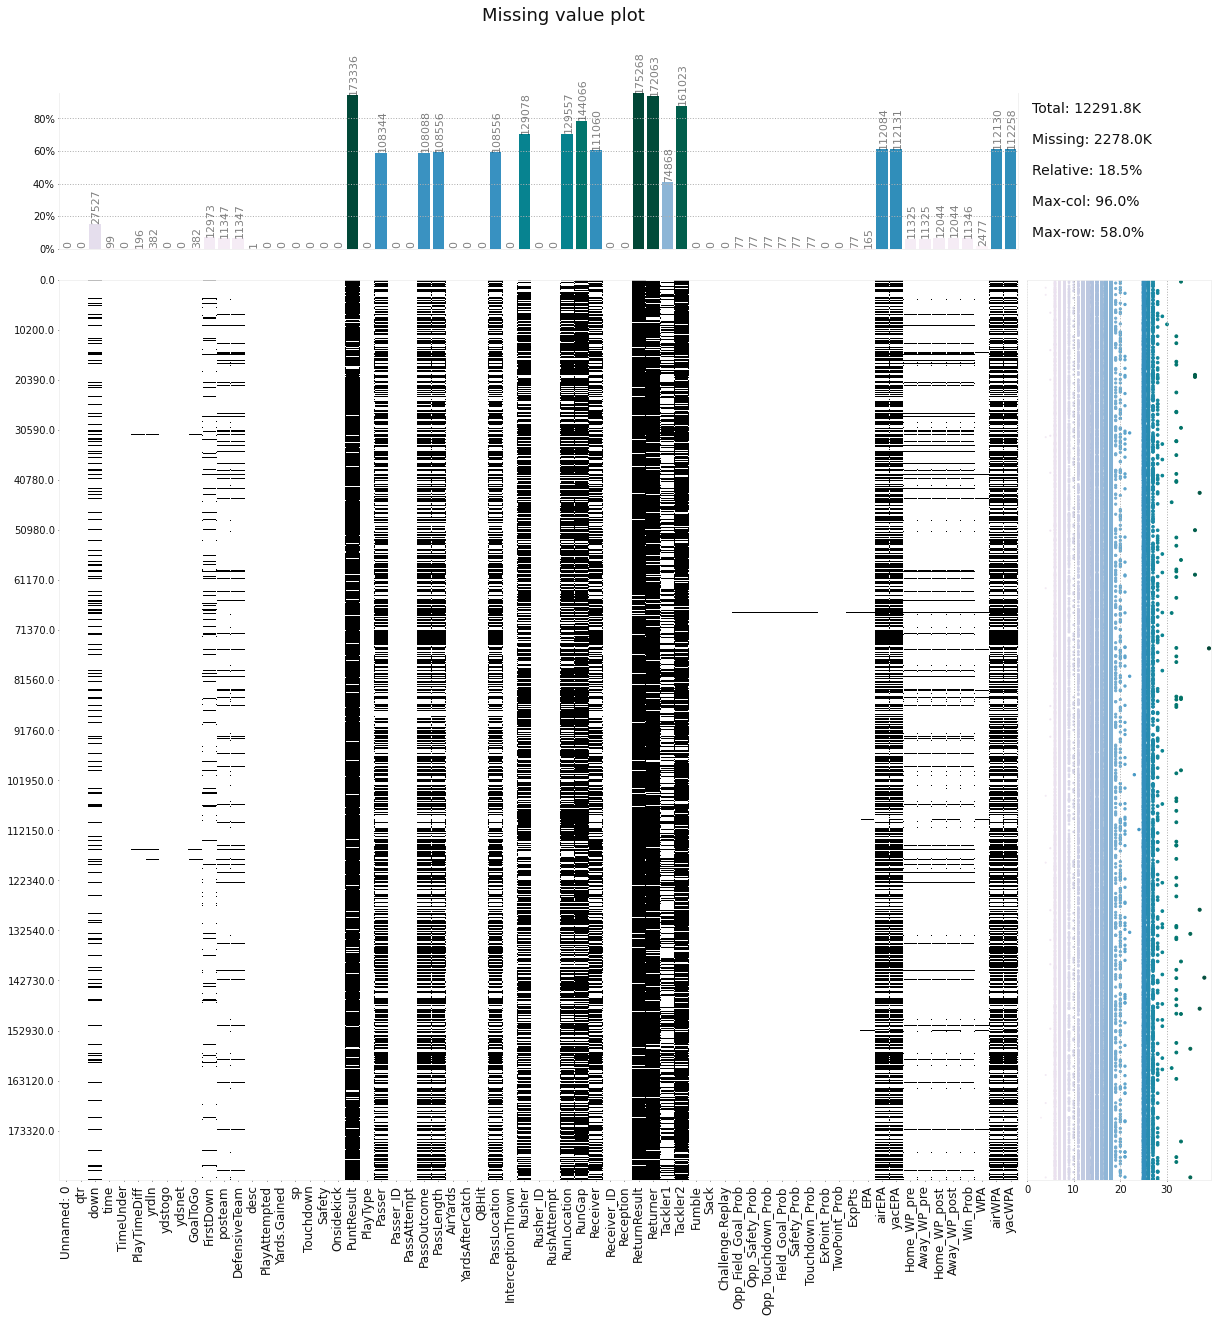

In [5]:
klib.missingval_plot(df)

# **Data Cleaning**

The ***data_cleaning()*** function essentially drops empty and single valued columns as well as empty and duplicate rows.

In [6]:
df_cleaned = klib.data_cleaning(df)

Shape of cleaned data: (183460, 63) - Remaining NAs: 1757318

Changes:
Dropped rows: 0
     of which 0 duplicates. (Rows: [])
Dropped columns: 4
     of which 1 single valued. (Columns: ['PlayAttempted'])
Dropped missing values: 520667
Reduced memory by at least: 59.37 MB (-63.3%)


# **Correlation Plot**

Here, we can examine the intercorrelation amongst the features.

### Display all correlations data.

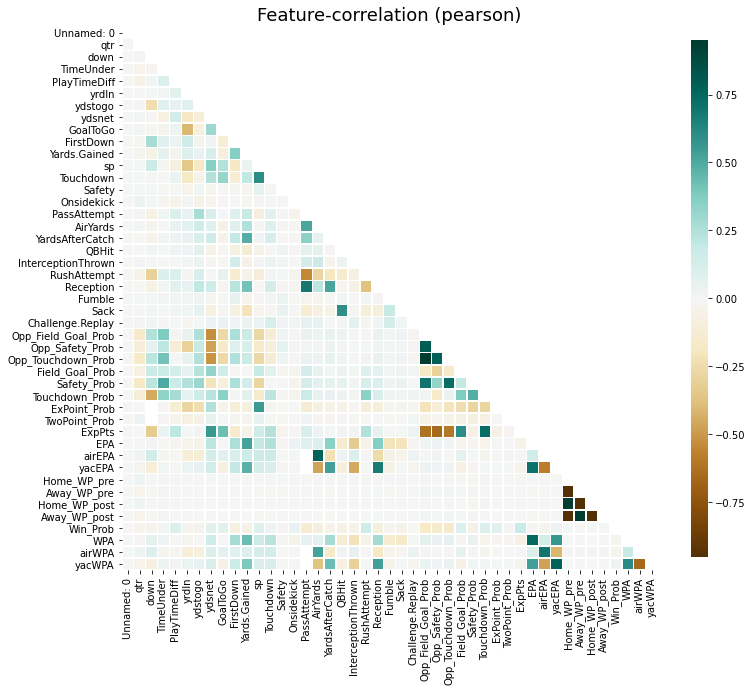

In [7]:
klib.corr_plot(df_cleaned, annot=False)

### Display only positive correlation.

Displaying positive correlations. Use "threshold" to further limit the results.


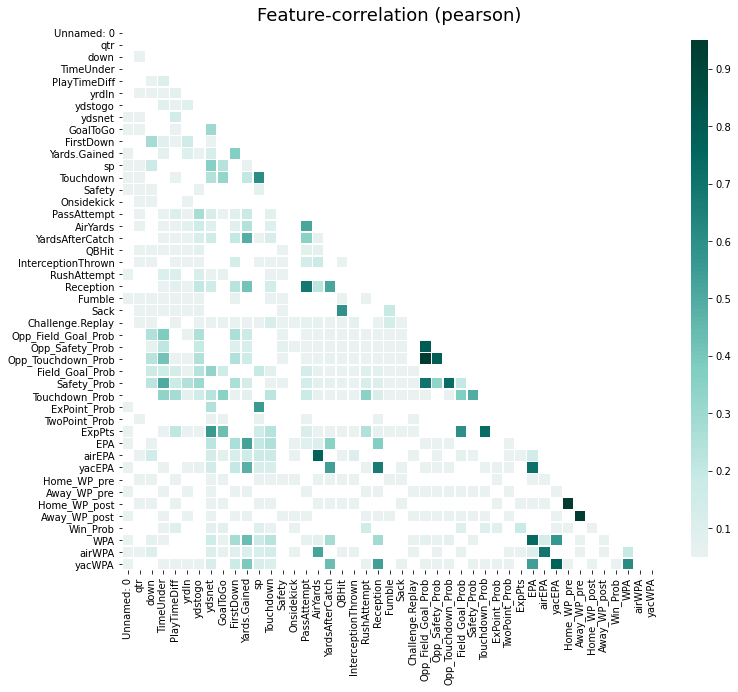

In [8]:
klib.corr_plot(df_cleaned, split='pos', annot=False)

### Display only negative correlation.

Displaying negative correlations. Use "threshold" to further limit the results.


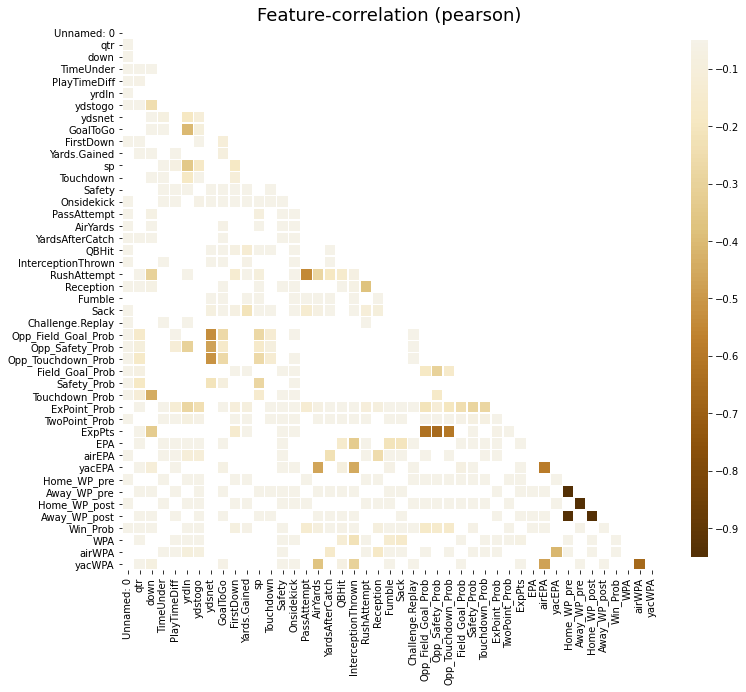

In [9]:
klib.corr_plot(df_cleaned, split='neg', annot=False)

Display correlation with a target variable of interest

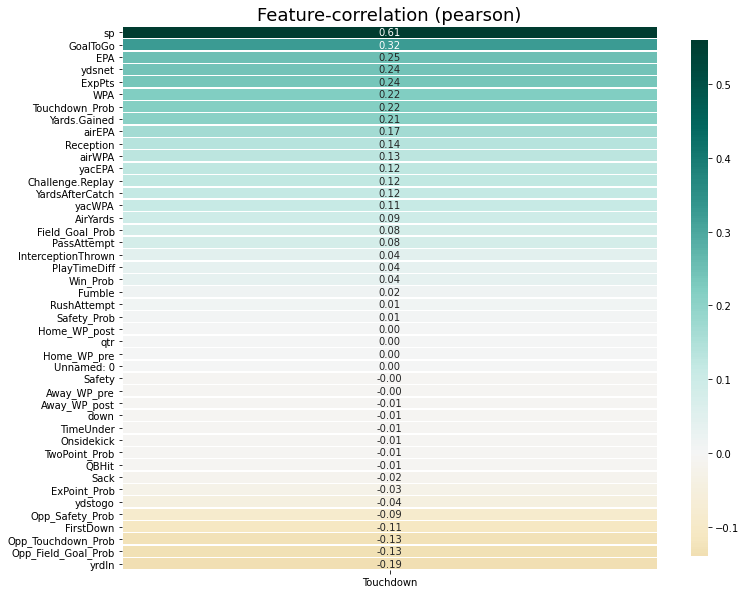

In [10]:
klib.corr_plot(df_cleaned, target='Touchdown')

### Correlation data matrix

In [11]:
klib.corr_mat(df_cleaned)

# **Distribution Plot**

Displays the distribution plot for columns of interest.

Dropped 11346 missing values from column Win_Prob.


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


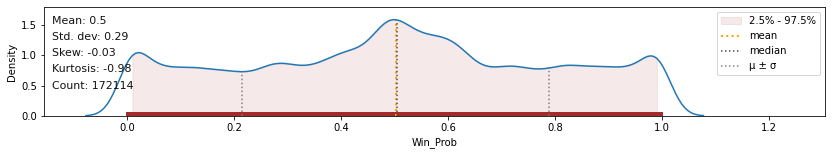

In [12]:
klib.dist_plot(df_cleaned['Win_Prob'])

# **Categorical Plot**

GridSpec(6, 21)

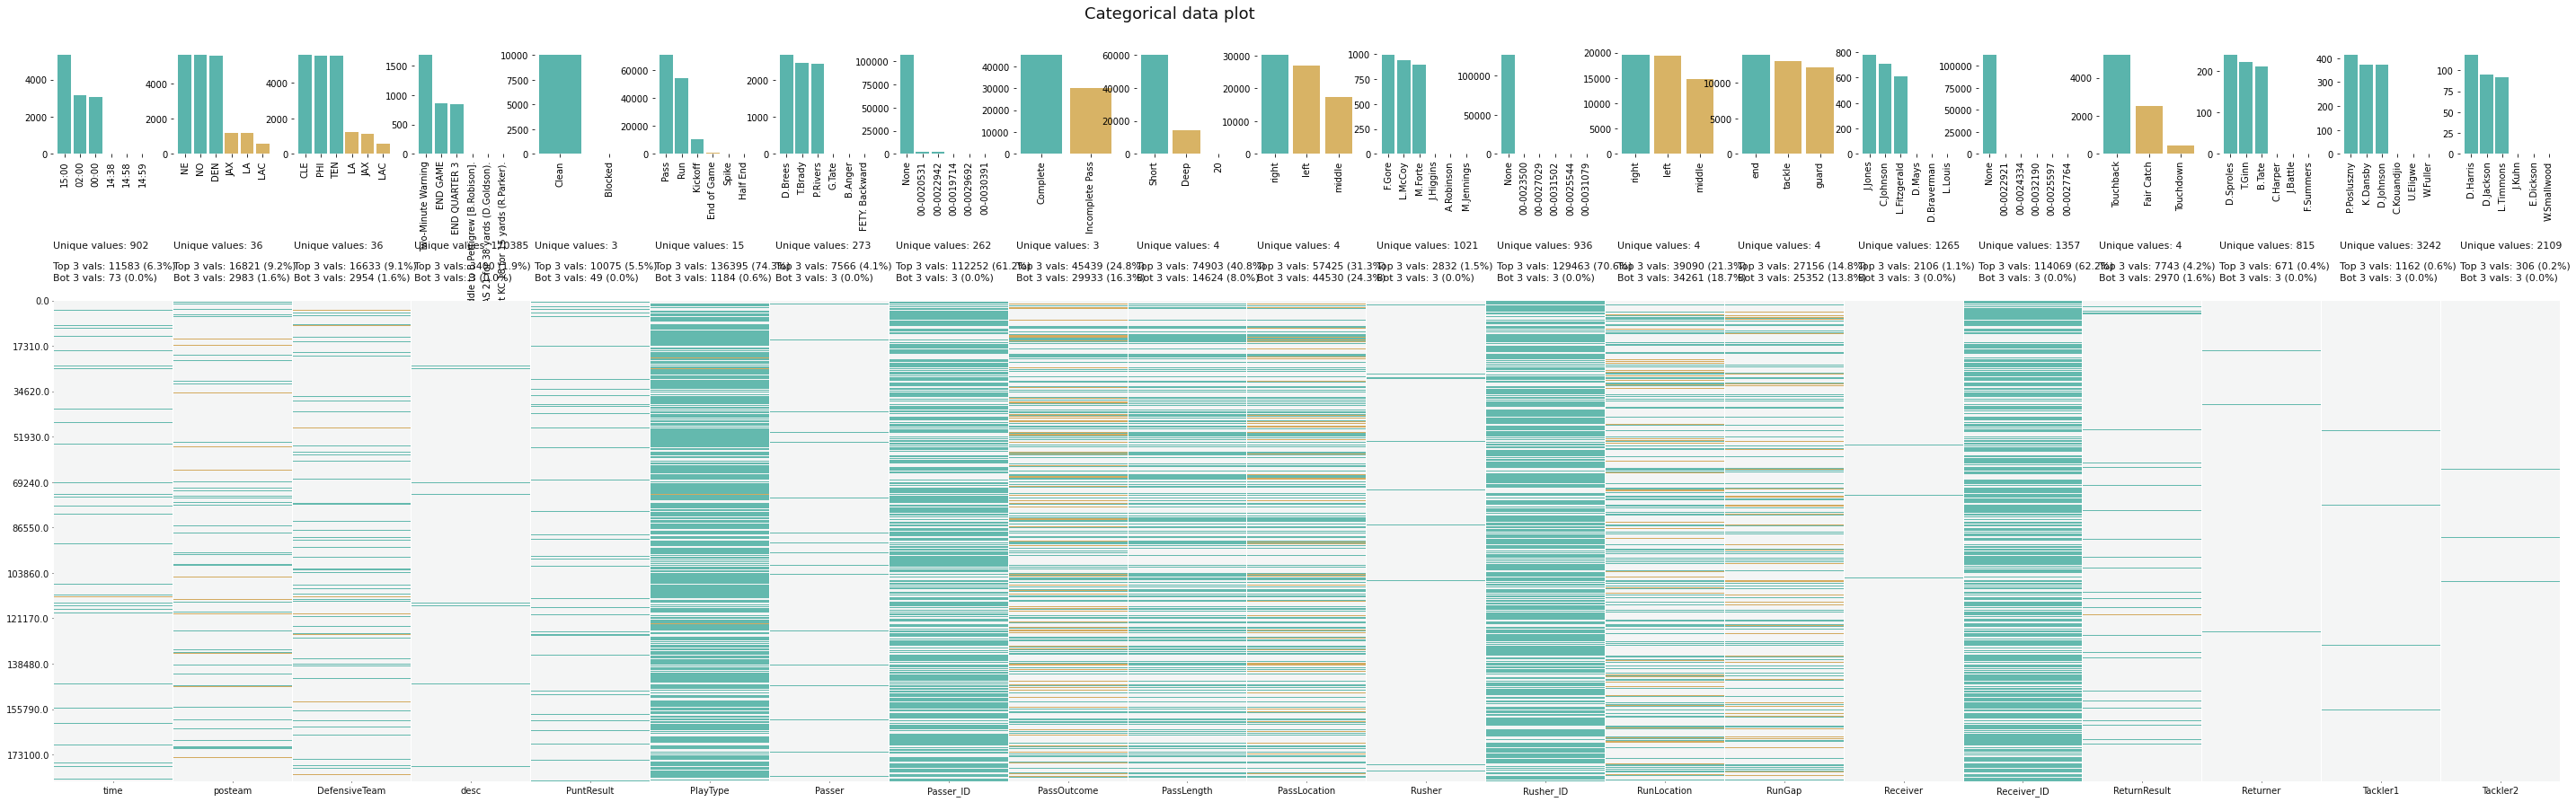

In [13]:
klib.cat_plot(df, figsize=(50,15))

# **Save Plot as a PDF file**

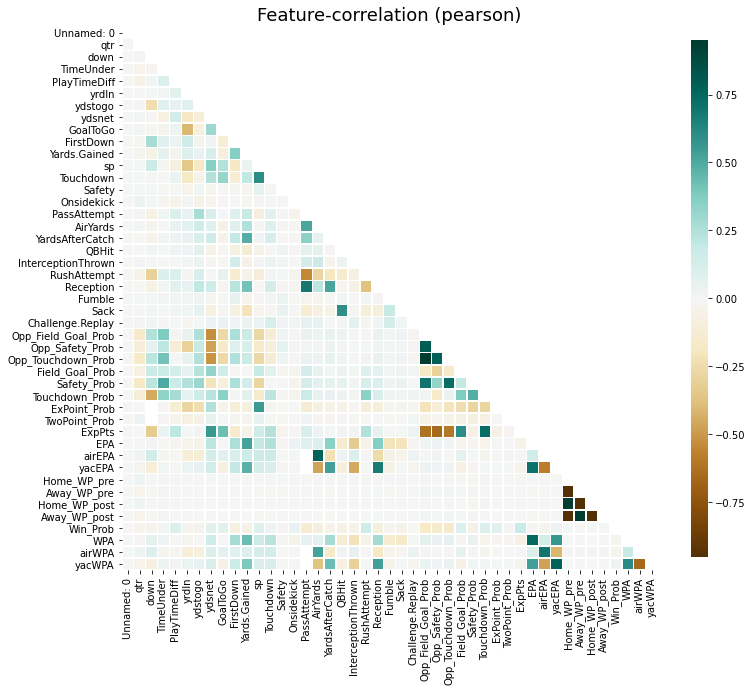

In [14]:
plot = klib.corr_plot(df_cleaned, annot=False, figsize=(12,10))

In [15]:
plot.figure.savefig('figure.pdf')

--------------------------------